<a href="https://colab.research.google.com/github/inside-river/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下は最小二乗法を用いて関数を近似し、そのグラフを生成するプログラムです。

xの値と、それに対応するyの値を入力してください。
値の入力を終わるときは、「stop」と入力してください。

x座標を入力せよ
x座標 : 6.60
対応するy座標を入力せよ
y座標 : 16.8
x座標を入力せよ
x座標 : 7.00
対応するy座標を入力せよ
y座標 : 18.2
x座標を入力せよ
x座標 : 7.60
対応するy座標を入力せよ
y座標 : 19.2
x座標を入力せよ
x座標 : 9.20
対応するy座標を入力せよ
y座標 : 23.5
x座標を入力せよ
x座標 : 11.7
対応するy座標を入力せよ
y座標 : 30.4
x座標を入力せよ
x座標 : 13.2
対応するy座標を入力せよ
y座標 : 30.9
x座標を入力せよ
x座標 : 14.7
対応するy座標を入力せよ
y座標 : 33.3
x座標を入力せよ
x座標 : stop
X = [6.6, 7.0, 7.6, 9.2, 11.7, 13.2, 14.7]
Y = [16.8, 18.2, 19.2, 23.5, 30.4, 30.9, 33.3]
a = 2.10 ± 0.10
b = 3.63 ± 1.09


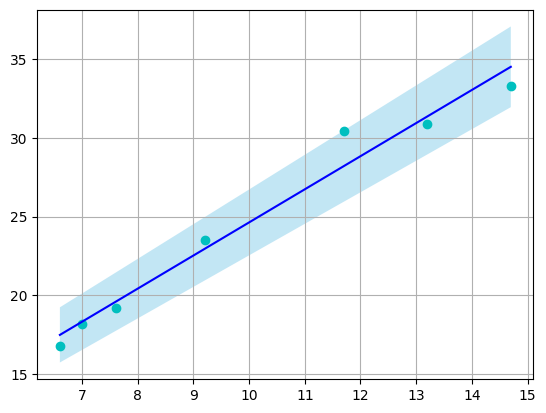

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

#近似したいxとyの値を入力してもらい、リストに格納する
X=[]
Y=[]
while True:                         #「stop」と入力されるまで繰り返す
  print('x座標を入力せよ')          #xの値を入力
  x_data=input('x座標 : ')
  if x_data=='stop':
    break
  print('対応するy座標を入力せよ')  #yの値を入力
  y_data=float(input('y座標 : '))
  x_data=float(x_data)
  X.append(x_data)                  #入力されたx,yの値をリストに格納する
  Y.append(y_data)
print('X =',X)
print('Y =',Y)

#以下は最小二乗法の計算過程である
X_sum=np.cumsum(X)[len(X)-1]     #xの総和
X_sum_2=X_sum**2                 #xの総和の２乗
Y_sum=np.cumsum(Y)[len(Y)-1]     #yの総和

X_2=np.array(X)**2                  #各xの2乗
X_2_sum=np.cumsum(X_2)[len(X_2)-1]  #xの2乗の総和

X_Y=np.array(X)*np.array(Y)         #対応するx,yの積
X_Y_sum=np.cumsum(X_Y)[len(X_Y)-1]  #対応するx,yの積の総和

#回帰式の傾きを求める
a=(len(X) * X_Y_sum - X_sum * Y_sum)/(len(X) * X_2_sum - X_sum_2)
#回帰式のy切片を求める
b=(X_2_sum * Y_sum - X_sum * X_Y_sum)/(len(X) * X_2_sum - X_sum_2)

aX_b = a * np.array(X) + b    #回帰式y=ax+b

Y__aX_b = np.array(Y) - aX_b  #残差（yと推定値の差）
Y__aX_b__2 = Y__aX_b **2      #残差の2乗
Y__aX_b__2_sum = np.cumsum(Y__aX_b__2)[len(Y__aX_b__2)-1]   #残差の2乗の合計

s_2_y = Y__aX_b__2_sum / (len(Y__aX_b__2)-2)  #yの平均2乗誤差の2乗

e_a = 0.6745 * (s_2_y * len(X) / (len(X) * X_2_sum - X_sum_2)) **(1/2)   #回帰式の傾きaの確率誤差
e_b = 0.6745 * (s_2_y * X_2_sum / (len(X) * X_2_sum - X_sum_2)) **(1/2)  #回帰式のy切片bの確率誤差

#回帰式の傾きa、y切片b、回帰式の傾きa・y切片bの確率誤差の有効数字を揃える
D_a = Decimal(str(a)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_b = Decimal(str(b)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_e_a = Decimal(str(e_a)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_e_b = Decimal(str(e_b)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

#回帰式の傾きa、y切片b、回帰式の傾きa・y切片bの確率誤差の有効数字を揃えたものをfloat型にする
fD_a = float(D_a)
fD_b = float(D_b)
fD_e_a = float(D_e_a)
fD_e_b = float(D_e_b)

y=fD_a * np.array(X) + fD_b   #回帰式 y=ax+b

upper = (fD_a + fD_e_a) * np.array(X) + (fD_b + fD_e_b)    #近似式の確率誤差を考慮したyの最大値
lower = (fD_a - fD_e_a) * np.array(X) + (fD_b - fD_e_b)    #近似式の確率誤差を考慮したyの最小値

#回帰式の傾きa、y切片bを表示
print('a =',D_a,'±',D_e_a)
print('b =',D_b,'±',D_e_b)

#グラフを表示する
plt.plot(X,Y,"co")  #入力された点（色：シアン）
plt.plot(X,y,"b-")  #近似式（色：青）
plt.fill_between(X,upper,lower,facecolor='skyblue',alpha=0.5)  #確率誤差を考慮した範囲を塗りつぶす（色：水色）
plt.grid()
plt.show()